In [18]:
import sys
import os

# Ruta al directorio raíz de tu proyecto
project_root = r"C:\Users\34645\Desktop\projects\GoogleTrends"

# Añadir src al path
sys.path.append(os.path.join(project_root, "src"))
sys.path.append(os.path.join(project_root, "config"))

from trends_processing import construir_panel_global
from keywords_mapping import COUNTRIES_KEYWORDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [19]:

df_panel = construir_panel_global(
    base_folder=r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_2\x",
    country_keywords=COUNTRIES_KEYWORDS,
    control_term="wikipedia"
)



📦 Procesando país: IT
  🔍 Keyword: auto
  🔍 Keyword: taxi
  🔍 Keyword: bicicletta
  🔍 Keyword: autobus
  🔍 Keyword: telelavoro
  🔍 Keyword: supermercato vicino
  🔍 Keyword: ristorante vicino
  🔍 Keyword: acquisti online
  🔍 Keyword: auto elettrica
  🔍 Keyword: colonnina di ricarica
  🔍 Keyword: consumo benzina
  🔍 Keyword: auto ibrida

📦 Procesando país: FR
  🔍 Keyword: voiture
  🔍 Keyword: taxi
  🔍 Keyword: vélo
  🔍 Keyword: autobus
  🔍 Keyword: télétravail
  🔍 Keyword: supermarché proche
  🔍 Keyword: restaurant proche
  🔍 Keyword: achat en ligne
  🔍 Keyword: voiture électrique
  🔍 Keyword: borne de recharge
  🔍 Keyword: consommation essence
  🔍 Keyword: voiture hybride

📦 Procesando país: DE
  🔍 Keyword: auto
  🔍 Keyword: taxi
  🔍 Keyword: fahrrad
  🔍 Keyword: bus
  🔍 Keyword: homeoffice
  🔍 Keyword: supermarkt in der nähe
  🔍 Keyword: restaurant in der nähe
  🔍 Keyword: online einkaufen
  🔍 Keyword: elektroauto
  🔍 Keyword: elektroauto aufladen
  🔍 Keyword: benzinverbrauch
  🔍 Keyw

In [22]:
df_panel.head()
df_panel["country"].unique()
df_panel["keyword_common"].value_counts()


keyword_common
taxi                1233
bike                1233
car                 1231
bus                 1229
remote_work         1225
online_shopping     1210
restaurant          1209
electric_car        1154
supermarket         1091
hybrid_car          1068
charging_station    1032
fuel_consumption     896
Name: count, dtype: int64

In [24]:
# Crear columna mensual
df_panel["year_month"] = df_panel["date"].dt.to_period("M")
df_wide = (
    df_panel
    .pivot_table(index=["country", "year_month"], columns="keyword_common", values="zscore")
    .reset_index()
)
df_wide.head()

print(df_wide.shape)
print(df_wide.columns)


(1257, 14)
Index(['country', 'year_month', 'bike', 'bus', 'car', 'charging_station',
       'electric_car', 'fuel_consumption', 'hybrid_car', 'online_shopping',
       'remote_work', 'restaurant', 'supermarket', 'taxi'],
      dtype='object', name='keyword_common')


In [29]:
df_wide

keyword_common,country,year_month,bike,bus,car,charging_station,electric_car,fuel_consumption,hybrid_car,online_shopping,remote_work,restaurant,supermarket,taxi
0,AT,2018-02,-0.950703,0.735988,-0.310883,-1.584376,-0.465478,2.214198,NaN,2.539167,-0.773601,-0.650371,-1.786578,1.117052
1,AT,2018-03,0.146259,0.746681,-0.185179,-1.440266,-1.929274,1.547436,NaN,1.435239,-1.094982,-1.414982,-1.645174,0.390059
2,AT,2018-04,1.291395,0.484463,0.181979,-1.886068,-0.675568,1.455353,NaN,1.341076,-1.078581,-0.931428,-1.536714,0.630923
3,AT,2018-05,1.074430,0.591489,0.029826,-1.497676,-1.286523,0.731457,NaN,1.341076,-0.724397,-0.714963,-1.566920,-0.275617
4,AT,2018-06,0.459929,1.051675,-0.049521,-0.806420,-1.095749,1.385458,NaN,1.325455,-0.625989,-1.277077,-0.991676,0.565205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,US,2024-09,0.052644,-0.175727,0.238323,0.791676,-0.000429,0.239023,0.502221,-0.041951,0.869030,-1.035145,-0.048923,-1.016530
1253,US,2024-10,-0.597010,-0.472493,0.099627,1.082030,0.362866,-0.440255,1.514110,-0.106244,0.719094,-0.868196,-0.530756,-0.543341
1254,US,2024-11,-0.949129,-0.769258,-0.330459,0.445297,-0.168520,-0.732161,1.361414,0.727930,-0.043789,-1.136999,0.065530,-1.513839
1255,US,2024-12,-0.750772,-0.601974,-0.476153,NaN,0.726161,-0.732161,0.196827,0.128952,-0.043789,-0.555995,0.604590,-0.482634


In [31]:
# — 1. Asegúrate de que `year_month` es datetime (formato YYYY-MM)
df_wide['year_month'] = df_wide['year_month'].to_timestamp(df_wide['year_month'], format='%Y-%m')

# — 2. Suprimo columnas que no quiero en PCA
cols_to_drop = ['keyword_common', 'country']  # ajusta si aparece otro nombre raro
df_num = df_wide.drop(columns=cols_to_drop, errors='ignore')

# — 3. Preparo el contenedor de resultados
results = []

# — 4. Itero por país
for country, grp in df_wide.groupby('country'):
    # 4.1 saco la serie temporal y filtro solo numéricas
    sub = grp.set_index('year_month')
    X = sub.select_dtypes(include=[np.number]).fillna(0)

    # 4.2 PCA para un solo componente
    pca = PCA(n_components=1)
    pc1 = pca.fit_transform(X)  # devuelve array T×1

    # 4.3 Armo DataFrame con resultados
    df_pc1 = pd.DataFrame({
        'country': country,
        'year_month': X.index,
        'synthetic_index': pc1.ravel(),
        'explained_var': pca.explained_variance_ratio_[0]
    })
    results.append(df_pc1)

# — 5. Concateno todo en un solo DF
df_index = pd.concat(results, ignore_index=True)

# Ya tienes:
# df_index[['country','year_month','synthetic_index','explained_var']]
print(df_index.head())


TypeError: Series.to_timestamp() got an unexpected keyword argument 'format'

In [ ]:
df_wide.groupby("country").size().sort_values()


country
FI     2
AT    17
PT    45
SE    58
ES    60
IT    61
US    67
DE    68
GB    69
NL    69
FR    70
dtype: int64

In [ ]:
df_indice = calcular_pca_por_pais(df_wide)
df_indice.head() 

keyword_common,country,year_month,indice_sintetico,var_explicada
0,AT,2018-11,4.149300,0.619749
1,AT,2019-01,4.489931,0.619749
2,AT,2019-09,2.749942,0.619749
3,AT,2020-01,4.600865,0.619749
4,AT,2020-08,-0.241218,0.619749


In [ ]:
df_indice

keyword_common,country,year_month,indice_sintetico,var_explicada
0,AT,2018-11,4.149300,0.619749
1,AT,2019-01,4.489931,0.619749
2,AT,2019-09,2.749942,0.619749
3,AT,2020-01,4.600865,0.619749
4,AT,2020-08,-0.241218,0.619749
...,...,...,...,...
579,US,2024-08,-0.969142,0.305584
580,US,2024-09,-0.739507,0.305584
581,US,2024-10,-1.060598,0.305584
582,US,2024-11,-0.907750,0.305584


In [ ]:
import matplotlib.pyplot as plt

# Filtramos la serie: Alemania, electric_car
serie = df_panel[
    (df_panel["country"] == "DE") &
    (df_panel["keyword_common"] == "electric_car")
].sort_values("date")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(serie["date"], serie["zscore"], label="electric_car (DE)")
plt.title("Interés en 'electric_car' en Alemania (z-score)")
plt.xlabel("Fecha")
plt.ylabel("Z-score normalizado")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime
from glob import glob
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
COUNTRIES_KEYWORDS = {
    "IT": ["auto", "taxi", "bicicletta", "autobus", "telelavoro",
    "supermercato vicino", "ristorante vicino", "acquisti online",
    "auto elettrica", "colonnina di ricarica", "consumo benzina", "auto ibrida"],
    "FR": [
        "voiture", "taxi", "vélo", "autobus",
        "télétravail", "supermarché proche", "restaurant proche", "achat en ligne",
        "voiture électrique", "borne de recharge", "consommation essence", "voiture hybride"
    ],
    "DE": ["auto", "taxi", "fahrrad", "bus", "homeoffice", "supermarkt in der nähe",
         "restaurant in der nähe", "online einkaufen", "elektroauto",
         "elektroauto aufladen", "benzinverbrauch", "hybridauto"],
    "US": [
        "car", "taxi", "bike", "bus",
        "work from home", "grocery store near me", "restaurant near me", "online shopping",
        "electric car", "charging station", "gas consumption", "hybrid car"
    ],
    "GB": [
        "car", "taxi", "bicycle", "bus",
        "work from home", "supermarket near me", "restaurant near me", "online shopping",
        "electric car", "charging point", "petrol consumption", "hybrid car"
    ],

    "ES": [
        "coche", "taxi", "bicicleta", "autobús",
        "teletrabajo", "supermercado cerca", "restaurante cerca", "compra online",
        "coche eléctrico", "electrolinera", "consumo gasolina", "coche híbrido"
    ],
    "PT": [
        "carro", "táxi", "bicicleta", "autocarro",
        "trabalho remoto", "supermercado perto", "restaurante perto", "compras online",
        "carro elétrico", "posto de carregamento", "consumo gasolina", "carro híbrido"
    ],
    }

In [ ]:

BASE_FOLDER = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_2\x"

# --- Equivalencias comunes ---
COMMON_KEYWORDS = {
    "bicicleta": "bike", "bicycle": "bike", "vélo": "bike", "bicicletta": "bike","fahrrad": "bike",
    "coche": "car", "car": "car", "auto": "car", "voiture": "car", "carro": "car",
    "autobús": "bus", "bus": "bus", "autocarro": "bus", "autobus": "bus",
    "teletrabajo": "remote_work", "work from home": "remote_work", "trabalho remoto": "remote_work", "télétravail": "remote_work", "homeoffice": "remote_work", "telelavoro": "remote_work",
    "supermercado cerca": "supermarket", "supermarket near me": "supermarket", "supermarché proche": "supermarket", "supermercado perto": "supermarket", "supermarkt in der nähe": "supermarket", "supermercato vicino": "supermarket", "grocery store near me": "supermarket",	
    "restaurante cerca": "restaurant", "restaurant near me": "restaurant", "restaurant proche": "restaurant", "restaurante perto": "restaurant", "restaurant in der nähe": "restaurant", "ristorante vicino": "restaurant",
    "compra online": "online_shopping", "online shopping": "online_shopping", "compras online": "online_shopping", "achat en ligne": "online_shopping", "online einkaufen": "online_shopping", "acquisti online": "online_shopping",
    "coche eléctrico": "electric_car", "electric car": "electric_car", "voiture électrique": "electric_car", "auto elettrica": "electric_car", "carro elétrico": "electric_car", "elektroauto": "electric_car",
    "electrolinera": "charging_station", "charging station": "charging_station", "borne de recharge": "charging_station", "posto de carregamento": "charging_station", "charging point": "charging_station", "colonnina di ricarica": "charging_station", "elektroauto aufladen": "charging_station",
    "consumo gasolina": "fuel_consumption", "gas consumption": "fuel_consumption", "consommation essence": "fuel_consumption", "consumo benzina": "fuel_consumption", "petrol consumption": "fuel_consumption", "benzinverbrauch": "fuel_consumption",
    "coche híbrido": "hybrid_car", "hybrid car": "hybrid_car", "voiture hybride": "hybrid_car", "auto ibrida": "hybrid_car", "carro híbrido": "hybrid_car", "hybridauto": "hybrid_car",
    "taxi": "taxi", "táxi": "taxi",
}

# --- Funciones base ---

def rename_value_column(df):
    if "time [UTC]" in df.columns:
        df = df.rename(columns={"time [UTC]": "date"})
    for c in df.columns:
        if c not in ["date", "keywords", "keyword", "country", "muestra_n", "timestamp", "value"]:
            df = df.rename(columns={c: "value"})
            break
    return df

def load_trend_data(base_folder, country, keyword, control_term="wikipedia"):
    def build_path(kw):
        filename = f"x_{country}_{kw.replace(' ', '_')}.csv"
        return os.path.join(base_folder, filename)

    df_x = rename_value_column(pd.read_csv(build_path(keyword)))
    df_comb = rename_value_column(pd.read_csv(build_path(f"{keyword} + {control_term}")))
    df_ctrl = rename_value_column(pd.read_csv(build_path(control_term)))

    return df_x, df_comb, df_ctrl

def get_common_samples(df_x, df_comb, df_ctrl):
    samples_x = set(df_x["muestra_n"])
    samples_comb = set(df_comb["muestra_n"])
    samples_ctrl = set(df_ctrl["muestra_n"])
    return sorted(samples_x & samples_comb & samples_ctrl)

def clean_sample(df, sample_n, value_col="value"):
    df_ = df[df["muestra_n"] == sample_n].copy()
    df_ = df_[~df_[value_col].isin([0, 100])]
    return df_

def imputar_muestra(df_x, df_comb, df_ctrl, sample_n):
    dx = clean_sample(df_x, sample_n)
    dcomb = clean_sample(df_comb, sample_n)
    dctrl = clean_sample(df_ctrl, sample_n)

    df = dx[["date", "value"]].rename(columns={"value": "x"}).copy()
    df = df.merge(dcomb[["date", "value"]].rename(columns={"value": "combined"}), on="date", how="inner")
    df = df.merge(dctrl[["date", "value"]].rename(columns={"value": "control"}), on="date", how="inner")

    if len(df) < 3:
        return None

    X = df[["combined", "control"]]
    y = df["x"]
    model = LinearRegression().fit(X, y)
    df["imputed"] = model.predict(X)
    return df[["date", "imputed"]]

def construir_serie_normalizada_con_imputaciones(base_folder, country, keyword):
    df_x, df_comb, df_ctrl = load_trend_data(base_folder, country, keyword)
    muestras_validas = get_common_samples(df_x, df_comb, df_ctrl)

    imputaciones = []
    for m in muestras_validas:
        df_imp = imputar_muestra(df_x, df_comb, df_ctrl, m)
        if df_imp is not None:
            df_imp["sample_n"] = m
            imputaciones.append(df_imp)

    if not imputaciones:
        return None

    df_all = pd.concat(imputaciones, ignore_index=True)
    df_all["date"] = pd.to_datetime(df_all["date"], format='mixed', errors='coerce')
    df_wide = df_all.pivot(index="date", columns="sample_n", values="imputed")
    df_wide["mean_imputed"] = df_wide.mean(axis=1)

    serie = df_wide["mean_imputed"]
    z = (serie - serie.mean()) / serie.std()

    keyword_common = COMMON_KEYWORDS.get(keyword.lower(), keyword.lower())

    df_z = pd.DataFrame({
        "date": serie.index,
        "keyword": keyword,
        "keyword_common": keyword_common,
        "country": country,
        "imputed": serie.values,
        "zscore": z.values
    }).reset_index(drop=True)

    return df_z

def construir_panel_global(base_folder, country_keywords):
    panel = []
    for country, keywords in country_keywords.items():
        print(f"\n📦 Procesando país: {country}")
        for keyword in keywords:
            print(f"  🔍 Keyword: {keyword}")
            try:
                df_z = construir_serie_normalizada_con_imputaciones(base_folder, country, keyword)
                if df_z is not None:
                    panel.append(df_z)
            except Exception as e:
                print(f"  ⚠️ Error con '{keyword}' en {country}: {e}")
    if panel:
        return pd.concat(panel, ignore_index=True)
    else:
        return None
# --- EJECUTAR PANEL ---
df_panel = construir_panel_global(BASE_FOLDER, COUNTRIES_KEYWORDS)

if df_panel is not None:
    print("✅ Panel generado con éxito. Muestras:", df_panel.shape)


📦 Procesando país: IT
  🔍 Keyword: auto
  🔍 Keyword: taxi
  🔍 Keyword: bicicletta
  🔍 Keyword: autobus
  🔍 Keyword: telelavoro
  🔍 Keyword: supermercato vicino
  🔍 Keyword: ristorante vicino
  🔍 Keyword: acquisti online
  🔍 Keyword: auto elettrica
  🔍 Keyword: colonnina di ricarica
  🔍 Keyword: consumo benzina
  🔍 Keyword: auto ibrida

📦 Procesando país: FR
  🔍 Keyword: voiture
  🔍 Keyword: taxi
  🔍 Keyword: vélo
  🔍 Keyword: autobus
  🔍 Keyword: télétravail
  🔍 Keyword: supermarché proche
  🔍 Keyword: restaurant proche
  🔍 Keyword: achat en ligne
  🔍 Keyword: voiture électrique
  🔍 Keyword: borne de recharge
  🔍 Keyword: consommation essence
  🔍 Keyword: voiture hybride

📦 Procesando país: DE
  🔍 Keyword: auto
  🔍 Keyword: taxi
  🔍 Keyword: fahrrad
  🔍 Keyword: bus
  🔍 Keyword: homeoffice
  🔍 Keyword: supermarkt in der nähe
  🔍 Keyword: restaurant in der nähe
  🔍 Keyword: online einkaufen
  🔍 Keyword: elektroauto
  🔍 Keyword: elektroauto aufladen
  🔍 Keyword: benzinverbrauch
  🔍 Keyw

In [ ]:
# Ruta donde tienes el panel generado
# df_panel ya está construido en tu script previo
# BASE_FOLDER = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_2\x"

# 1. Crear tabla resumen: número de muestras por país y keyword
tabla_resumen = (
    df_panel.groupby(["country", "keyword_common"])
    .agg(
        total_observations=("zscore", "count"),  # Total puntos de datos
        start_date=("date", "min"),              # Primer mes disponible
        end_date=("date", "max")                  # Último mes disponible
    )
    .reset_index()
)

# 2. Opcional: ordenar tabla para que quede más limpia
tabla_resumen = tabla_resumen.sort_values(by=["country", "keyword_common"]).reset_index(drop=True)

# 3. Mostrar pequeña preview
print("📊 Tabla resumen de muestras:")
print(tabla_resumen.head(10))

# 4. Guardar en CSV para apéndice del paper
output_path = r"C:\Users\34645\Desktop\projects\GoogleTrends\result"
os.makedirs(output_path, exist_ok=True)

tabla_resumen.to_csv(os.path.join(output_path, "appendix_trends_samples.csv"), index=False, float_format="%.0f")

print(f"✅ Archivo de apéndice guardado correctamente en {output_path}\\appendix_trends_samples.csv")


📊 Tabla resumen de muestras:
  country    keyword_common  total_observations start_date   end_date
0      DE              bike                  83 2018-01-01 2025-01-01
1      DE               bus                  83 2018-01-01 2025-01-01
2      DE               car                  84 2018-01-01 2025-01-01
3      DE  charging_station                  84 2018-01-01 2025-01-01
4      DE      electric_car                  83 2018-01-01 2025-01-01
5      DE  fuel_consumption                  83 2018-01-01 2025-01-01
6      DE        hybrid_car                  83 2018-01-01 2025-01-01
7      DE   online_shopping                  83 2018-01-01 2025-01-01
8      DE       remote_work                  83 2018-01-01 2025-01-01
9      DE        restaurant                  83 2018-01-01 2025-01-01
✅ Archivo de apéndice guardado correctamente en C:\Users\34645\Desktop\projects\GoogleTrends\result\appendix_trends_samples.csv


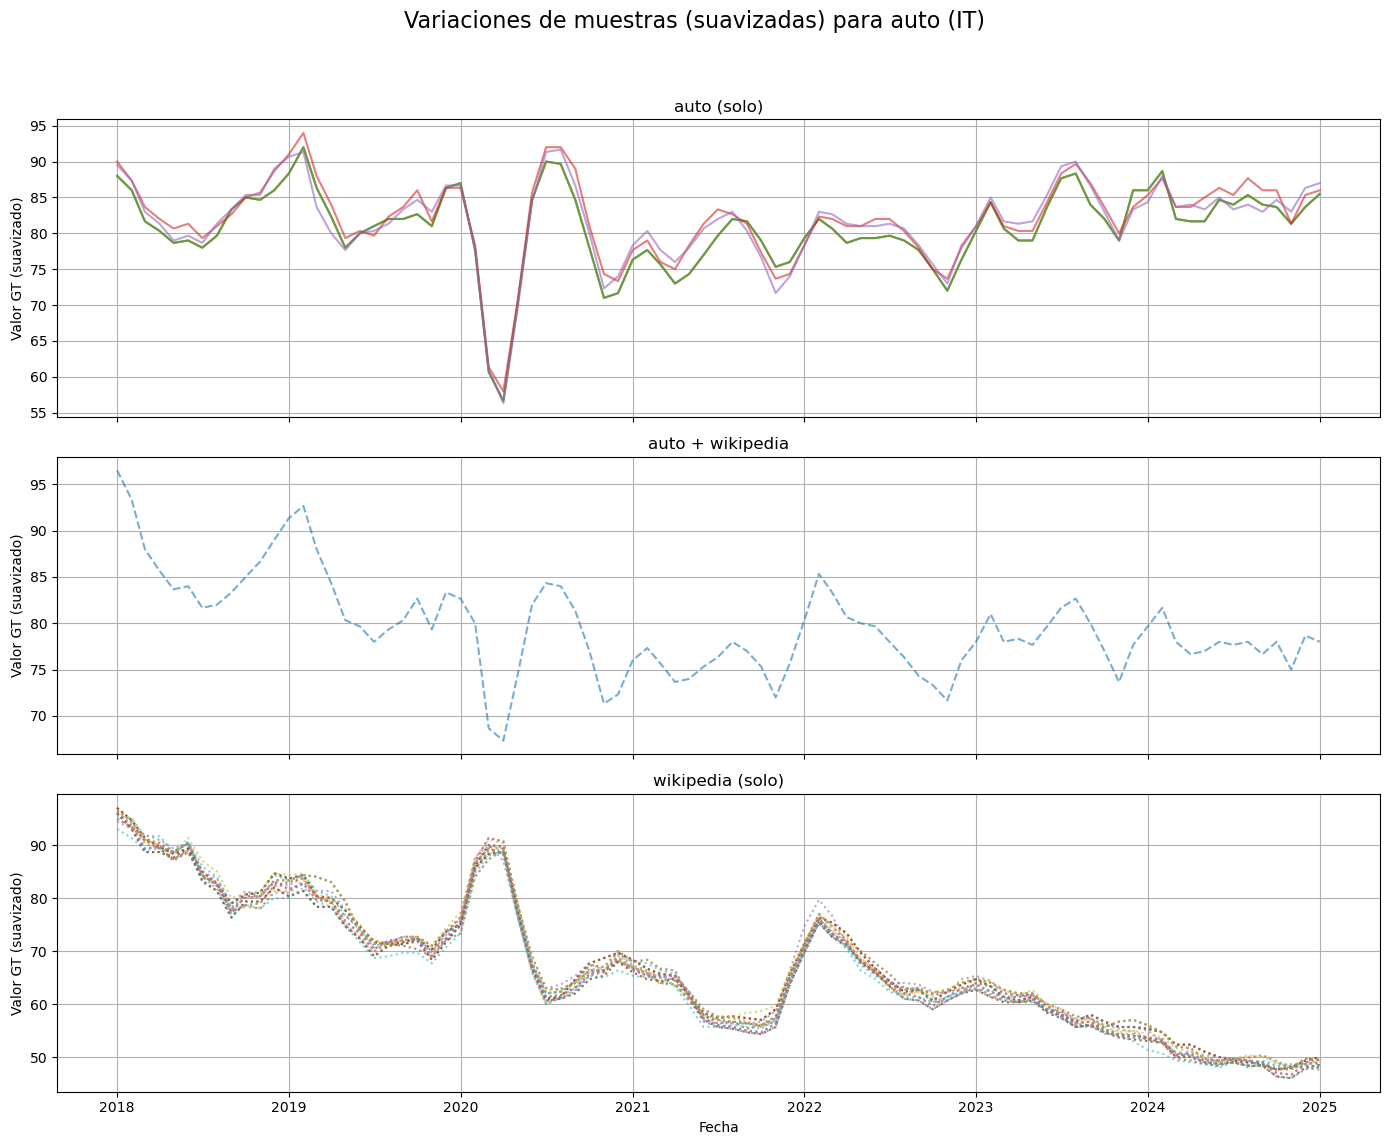

In [ ]:
# --- Configuración ---
BASE_FOLDER = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_2\x"

# --- Funciones auxiliares ---
def rename_value_column(df):
    if "time [UTC]" in df.columns:
        df = df.rename(columns={"time [UTC]": "date"})
    for c in df.columns:
        if c not in ["date", "keywords", "keyword", "country", "muestra_n", "timestamp", "value"]:
            df = df.rename(columns={c: "value"})
            break
    return df

def load_trend_file(country, keyword):
    filename = f"x_{country}_{keyword.replace(' ', '_')}.csv"
    filepath = os.path.join(BASE_FOLDER, filename)
    if not os.path.exists(filepath):
        print(f"❌ Archivo no encontrado: {filepath}")
        return None
    df = pd.read_csv(filepath)
    return rename_value_column(df)

def plot_superpuestas_subplots_suavizado(country, keyword, control="wikipedia", smooth_window=3):
    # Cargar los tres archivos
    df_keyword = load_trend_file(country, keyword)
    df_combined = load_trend_file(country, f"{keyword} + {control}")
    df_control = load_trend_file(country, control)

    if df_keyword is None or df_combined is None or df_control is None:
        print("⚠️ Alguno de los archivos falta, no se puede graficar.")
        return

    # --- Crear figura y subplots ---
    fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

    # --- Subplot 1: Keyword solo ---
    axes[0].set_title(f"{keyword} (solo)")
    for sample in sorted(df_keyword["muestra_n"].unique()):
        df_s = df_keyword[df_keyword["muestra_n"] == sample]
        df_s = df_s.sort_values("date")
        dates = pd.to_datetime(df_s["date"], errors="coerce")
        values = df_s["value"].rolling(window=smooth_window, center=True, min_periods=1).mean()
        axes[0].plot(dates, values, alpha=0.6)
    axes[0].grid(True)
    axes[0].set_ylabel("Valor GT (suavizado)")

    # --- Subplot 2: Keyword + Control ---
    axes[1].set_title(f"{keyword} + {control}")
    for sample in sorted(df_combined["muestra_n"].unique()):
        df_s = df_combined[df_combined["muestra_n"] == sample]
        df_s = df_s.sort_values("date")
        dates = pd.to_datetime(df_s["date"], errors="coerce")
        values = df_s["value"].rolling(window=smooth_window, center=True, min_periods=1).mean()
        axes[1].plot(dates, values, linestyle="--", alpha=0.6)
    axes[1].grid(True)
    axes[1].set_ylabel("Valor GT (suavizado)")

    # --- Subplot 3: Control solo ---
    axes[2].set_title(f"{control} (solo)")
    for sample in sorted(df_control["muestra_n"].unique()):
        df_s = df_control[df_control["muestra_n"] == sample]
        df_s = df_s.sort_values("date")
        dates = pd.to_datetime(df_s["date"], errors="coerce")
        values = df_s["value"].rolling(window=smooth_window, center=True, min_periods=1).mean()
        axes[2].plot(dates, values, linestyle=":", alpha=0.6)
    axes[2].grid(True)
    axes[2].set_ylabel("Valor GT (suavizado)")
    axes[2].set_xlabel("Fecha")

    plt.suptitle(f"Variaciones de muestras (suavizadas) para {keyword} ({country})", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- USO ---
# Cambias solo país y keyword si quieres otro ejemplo:
plot_superpuestas_subplots_suavizado(country="IT", keyword="auto", control="wikipedia")



In [ ]:
def revisar_keywords_it(base_folder, keywords, country="IT"):
    for kw in keywords:
        files = [
            f"x_{country}_{kw.replace(' ', '_')}.csv",
            f"x_{country}_{kw.replace(' ', '_')}_+_wikipedia.csv",
            f"x_{country}_wikipedia.csv"
        ]
        print(f"🔍 Keyword: {kw}")
        for file in files:
            path = os.path.join(base_folder, file)
            exists = os.path.exists(path)
            print(f"   - {'✅' if exists else '❌'} {file}")

# Lista original de keywords de IT
keywords_it = [
    "auto", "taxi", "bicicletta", "autobus", "telelavoro",
    "supermercato vicino", "ristorante vicino", "acquisti online",
    "auto elettrica", "colonnina di ricarica", "consumo benzina", "auto ibrida"
]

# Cambia esto a tu ruta de datos reales
carpeta_datos = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_2\x"

revisar_keywords_it(carpeta_datos, keywords_it)


🔍 Keyword: auto
   - ✅ x_IT_auto.csv
   - ✅ x_IT_auto_+_wikipedia.csv
   - ✅ x_IT_wikipedia.csv
🔍 Keyword: taxi
   - ✅ x_IT_taxi.csv
   - ✅ x_IT_taxi_+_wikipedia.csv
   - ✅ x_IT_wikipedia.csv
🔍 Keyword: bicicletta
   - ✅ x_IT_bicicletta.csv
   - ✅ x_IT_bicicletta_+_wikipedia.csv
   - ✅ x_IT_wikipedia.csv
🔍 Keyword: autobus
   - ✅ x_IT_autobus.csv
   - ✅ x_IT_autobus_+_wikipedia.csv
   - ✅ x_IT_wikipedia.csv
🔍 Keyword: telelavoro
   - ✅ x_IT_telelavoro.csv
   - ✅ x_IT_telelavoro_+_wikipedia.csv
   - ✅ x_IT_wikipedia.csv
🔍 Keyword: supermercato vicino
   - ✅ x_IT_supermercato_vicino.csv
   - ✅ x_IT_supermercato_vicino_+_wikipedia.csv
   - ✅ x_IT_wikipedia.csv
🔍 Keyword: ristorante vicino
   - ✅ x_IT_ristorante_vicino.csv
   - ✅ x_IT_ristorante_vicino_+_wikipedia.csv
   - ✅ x_IT_wikipedia.csv
🔍 Keyword: acquisti online
   - ✅ x_IT_acquisti_online.csv
   - ✅ x_IT_acquisti_online_+_wikipedia.csv
   - ✅ x_IT_wikipedia.csv
🔍 Keyword: auto elettrica
   - ✅ x_IT_auto_elettrica.csv
   - ✅ x_IT_a

In [ ]:
df_panel

,date,keyword,keyword_common,country,imputed,zscore
0,2018-01-01,taxi,taxi,IT,45.146895,-0.527706
1,2018-02-01,taxi,taxi,IT,32.615882,-1.367146
2,2018-03-01,taxi,taxi,IT,50.112674,-0.195053
3,2018-04-01,taxi,taxi,IT,54.031010,0.067432
4,2018-06-01,taxi,taxi,IT,56.172523,0.210890
...,...,...,...,...,...,...
6794,2024-09-01,carro híbrido,hybrid_car,PT,64.692173,1.442934
6795,2024-10-01,carro híbrido,hybrid_car,PT,65.063214,1.483347
6796,2024-11-01,carro híbrido,hybrid_car,PT,65.733456,1.556348
6797,2024-12-01,carro híbrido,hybrid_car,PT,64.352786,1.405969


In [ ]:
def verificar_keywords_por_pais(df_panel):
    conteo = df_panel.groupby("country")["keyword_common"].nunique().sort_values()
    print("🔎 Número de keywords comunes por país:\n")
    print(conteo)
    return conteo

In [ ]:
verificar_keywords_por_pais(df_panel)


🔎 Número de keywords comunes por país:

country
IT    10
DE    12
ES    12
FR    12
GB    12
PT    12
US    12
Name: keyword_common, dtype: int64


country
IT    10
DE    12
ES    12
FR    12
GB    12
PT    12
US    12
Name: keyword_common, dtype: int64

In [ ]:
def filtrar_keywords_comunes(df_panel):
    # Paso 1: obtener cuántos países hay
    total_paises = df_panel["country"].nunique()

    # Paso 2: contar en cuántos países aparece cada keyword_common
    cobertura = df_panel.groupby("keyword_common")["country"].nunique()

    # Paso 3: seleccionar solo las que aparecen en todos los países
    keywords_validas = cobertura[cobertura == total_paises].index.tolist()

    # Paso 4: filtrar el panel
    df_filtrado = df_panel[df_panel["keyword_common"].isin(keywords_validas)].copy()

    return df_filtrado, keywords_validas

In [ ]:
df_panel_filtrado, keywords_comunes_usadas = filtrar_keywords_comunes(df_panel)

print("✅ Keywords comunes retenidas:", keywords_comunes_usadas)

✅ Keywords comunes retenidas: ['bike', 'bus', 'charging_station', 'electric_car', 'fuel_consumption', 'online_shopping', 'remote_work', 'restaurant', 'supermarket', 'taxi']


📈 Varianza explicada por componente:
PC1: 32.653% (λ = 3.60)
PC2: 17.790% (λ = 1.96)
PC3: 13.141% (λ = 1.45)
PC4: 10.064% (λ = 1.11)
PC5: 6.841% (λ = 0.75)
PC6: 5.981% (λ = 0.66)
PC7: 4.656% (λ = 0.51)
PC8: 3.293% (λ = 0.36)
PC9: 2.633% (λ = 0.29)
PC10: 1.771% (λ = 0.20)
PC11: 1.177% (λ = 0.13)

✅ Componentes con λ > 1 (Regla de Kaiser): 4


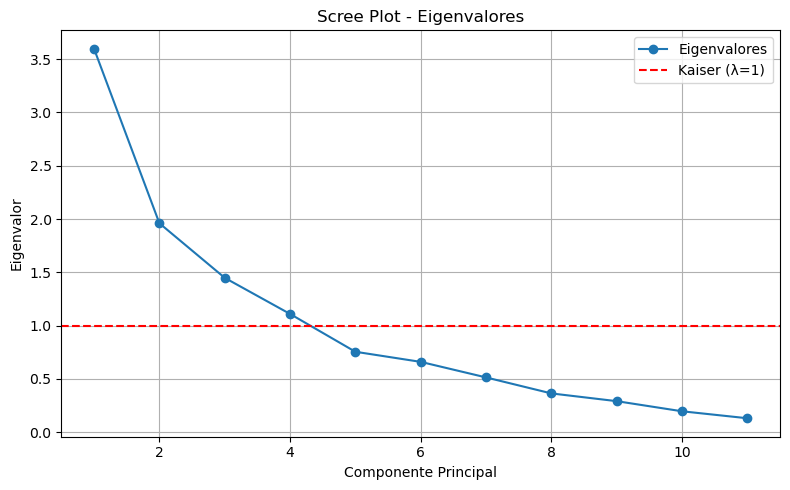


📊 Primeras filas de los scores:
        date country       PC1       PC2       PC3       PC4       PC5  \
0 2018-01-01      DE  1.444438  1.102064  3.845481 -1.991804  1.271960   
1 2018-01-01      FR  2.593970 -2.014625  0.333891 -2.050841  1.588621   
2 2018-01-01      GB  2.950085 -2.111610  0.429483  1.097741 -0.781662   
3 2018-01-01      IT  2.006420 -1.126010 -3.544272 -1.769741  1.674838   
4 2018-01-01      PT  4.184212  0.910749  2.077935 -0.706454 -0.899688   

        PC6       PC7       PC8       PC9      PC10      PC11  
0  0.254909 -0.322654 -0.489380  0.522602 -0.152536  0.268533  
1  1.112446  0.154077 -0.842454 -0.437352 -0.536336 -0.063313  
2 -0.495601  1.677293 -0.221114  0.663287  0.202284 -0.673546  
3 -0.245527 -0.111685 -0.435397  0.755247 -0.660602  0.344949  
4 -1.258501  0.070515 -1.152092 -0.694265 -0.366034  0.611287  

🔍 Cargas (loadings):
keyword_common      bike       bus       car  electric_car  fuel_consumption  \
PC1            -0.085379 -0.161762 -

In [ ]:

# ---------------------
# 1. Preparar el panel
# ---------------------
def preparar_panel_para_pca(df_panel, eliminar_columnas=None, metodo_imputacion="media"):
    df_pivot = df_panel.pivot_table(
        index=["date", "country"],
        columns="keyword_common",
        values="zscore"
    ).reset_index()

    if eliminar_columnas:
        df_pivot = df_pivot.drop(columns=eliminar_columnas, errors="ignore")

    if metodo_imputacion == "media":
        df_pivot_imputado = df_pivot.fillna(df_pivot.mean(numeric_only=True))
    elif metodo_imputacion == "mediana":
        df_pivot_imputado = df_pivot.fillna(df_pivot.median(numeric_only=True))
    else:
        raise ValueError("Método de imputación no reconocido")

    return df_pivot_imputado

# ---------------------
# 2. Aplicar PCA
# ---------------------
def aplicar_pca(df_pivot, n_components=None):
    df_index = df_pivot[["date", "country"]]
    df_vars = df_pivot.drop(columns=["date", "country"])

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_vars)

    pca = PCA(n_components=n_components)
    components = pca.fit_transform(X_scaled)

    df_scores = pd.DataFrame(components, columns=[f"PC{i+1}" for i in range(components.shape[1])])
    df_scores = pd.concat([df_index.reset_index(drop=True), df_scores], axis=1)

    df_loadings = pd.DataFrame(
        pca.components_, 
        columns=df_vars.columns, 
        index=[f"PC{i+1}" for i in range(pca.n_components_)]
    )

    var_exp = pca.explained_variance_ratio_
    eigenvalues = pca.explained_variance_

    return df_scores, df_loadings, var_exp, eigenvalues

# ---------------------
# 3. Regla de Kaiser + Scree Plot
# ---------------------
def analizar_componentes(eigenvalues, var_exp):
    print("📈 Varianza explicada por componente:")
    for i, v in enumerate(var_exp):
        print(f"PC{i+1}: {v:.3%} (λ = {eigenvalues[i]:.2f})")

    kaiser_count = np.sum(eigenvalues > 1)
    print(f"\n✅ Componentes con λ > 1 (Regla de Kaiser): {kaiser_count}")

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', label="Eigenvalores")
    plt.axhline(y=1, color="red", linestyle="--", label="Kaiser (λ=1)")
    plt.title("Scree Plot - Eigenvalores")
    plt.xlabel("Componente Principal")
    plt.ylabel("Eigenvalor")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------------------
# 4. EJECUTAR TODO
# ---------------------
# Tus datos originales: df_panel
# Preparar el panel
df_pivot_pca = preparar_panel_para_pca(
    df_panel,
    eliminar_columnas=["charging_station"],  # quita variables si hace falta
    metodo_imputacion="media"                # o "mediana"
)

# Aplicar PCA
df_scores, df_loadings, var_exp, eigenvalues = aplicar_pca(df_pivot_pca)

# Analizar varianza
analizar_componentes(eigenvalues, var_exp)

# Mostrar resultados (opcionales)
print("\n📊 Primeras filas de los scores:")
print(df_scores.head())

print("\n🔍 Cargas (loadings):")
print(df_loadings)

In [ ]:
def construir_indice_sostenible(df_scores, var_exp, eigenvalues):
    """
    Construye un índice de movilidad sostenible a partir de los componentes con λ > 1,
    ponderados por su varianza explicada.
    """
    # 1. Seleccionar componentes válidas (λ > 1)
    indices_kaiser = np.where(eigenvalues > 1)[0]
    pcs_validas = [f"PC{i+1}" for i in indices_kaiser]

    if not pcs_validas:
        raise ValueError("No hay componentes con eigenvalor > 1 (Kaiser)")

    # 2. Ponderaciones normalizadas
    pesos = var_exp[indices_kaiser]
    pesos_normalizados = pesos / pesos.sum()

    # 3. Calcular índice ponderado
    matriz_componentes = df_scores[pcs_validas].values
    indice = np.dot(matriz_componentes, pesos_normalizados)

    df_indice = df_scores[["date", "country"]].copy()
    df_indice["movilidad_sostenible"] = indice

    # 4. Normalizar (Z-score global)
    z = (df_indice["movilidad_sostenible"] - df_indice["movilidad_sostenible"].mean()) / df_indice["movilidad_sostenible"].std()
    df_indice["indice_normalizado"] = z

    return df_indice


In [ ]:
df_indice = construir_indice_sostenible(df_scores, var_exp, eigenvalues)

print("📊 Índice de movilidad sostenible por país y fecha:")
print(df_indice.head())

📊 Índice de movilidad sostenible por país y fecha:
        date country  movilidad_sostenible  indice_normalizado
0 2018-01-01      DE              1.320575            1.401042
1 2018-01-01      FR              0.442751            0.469729
2 2018-01-01      GB              1.024528            1.086956
3 2018-01-01      IT             -0.256650           -0.272288
4 2018-01-01      PT              2.349350            2.492503


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_indice_por_pais(df_indice, columna="indice_normalizado"):
    """
    Grafica la serie temporal del índice de movilidad sostenible por país.
    
    Parámetros:
        df_indice: DataFrame con columnas 'date', 'country' y el índice.
        columna: Nombre de la columna a graficar (por defecto, índice normalizado).
    """
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_indice, x="date", y=columna, hue="country", marker="o")
    
    plt.title("📈 Índice de Movilidad Sostenible (Z-score) por País")
    plt.xlabel("Fecha")
    plt.ylabel("Índice Normalizado")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="País", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.show()


C:\Users\34645\AppData\Local\Temp\ipykernel_20972\1769368297.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\34645\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


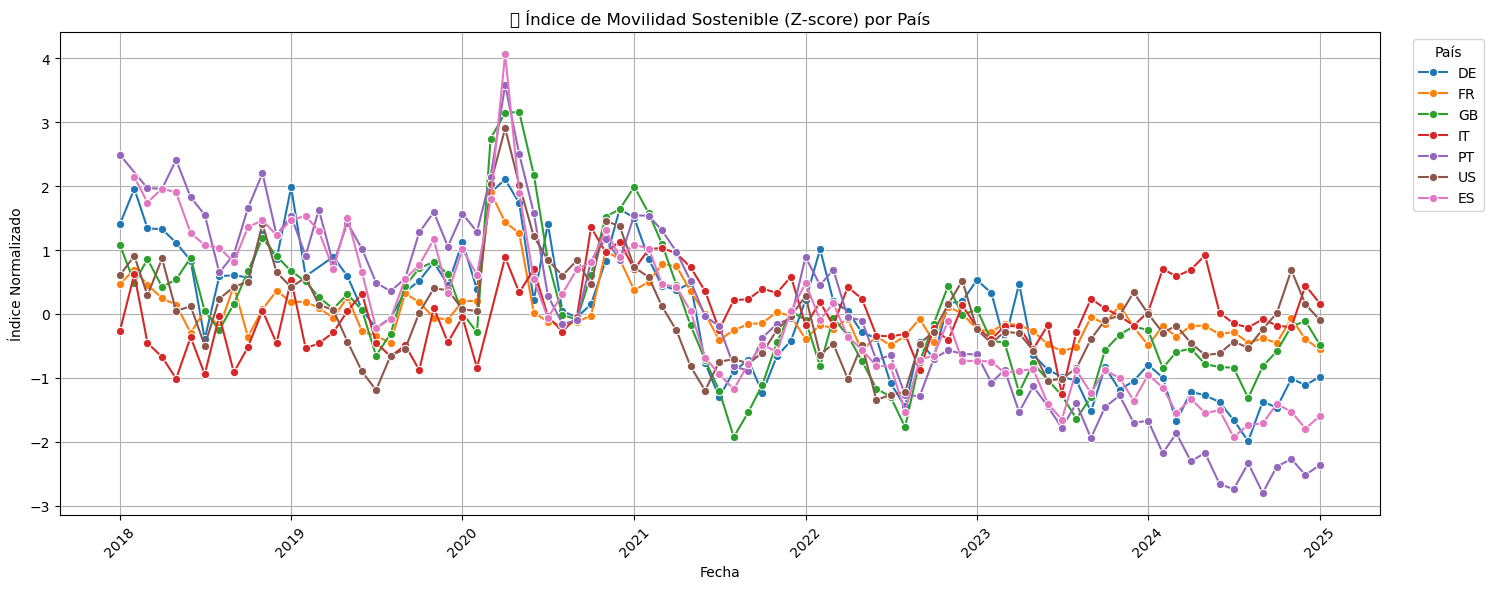

In [ ]:
graficar_indice_por_pais(df_indice)


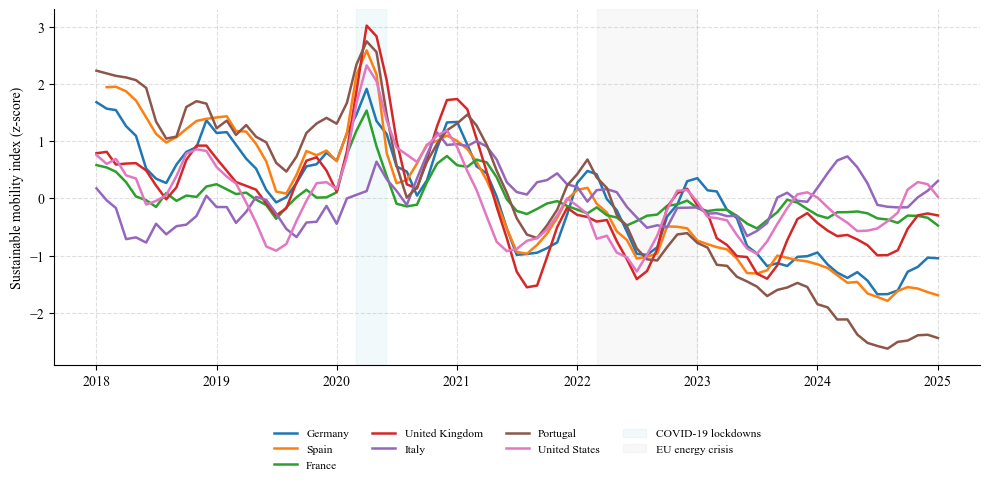

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({
    "figure.figsize": (10, 5),
    "font.family": "Times new roman",
    "font.size": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.4,
    "legend.frameon": False
})

# Suponiendo que ya tienes `df_indice` procesado como antes:
df_plot = (
    df_indice
      .sort_values("date")
      .assign(IDMS_smooth=lambda d: d.groupby("country")["indice_normalizado"]
                                      .transform(lambda s: s.rolling(3, center=True, min_periods=1).mean()))
)

# Etiquetas país en orden deseado
country_labels = {
    "DE": "Germany", "FR": "France", "GB": "United Kingdom",
    "IT": "Italy", "PT": "Portugal", "US": "United States", "ES": "Spain"
}

fig, ax = plt.subplots()

for country, g in df_plot.groupby("country"):
    label = country_labels.get(country, country)
    ax.plot(g["date"], g["IDMS_smooth"], label=label, linewidth=1.8)

# Eventos globales
ax.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2020-05-31"),
           alpha=.15, color="lightblue", label="COVID-19 lockdowns")
ax.axvspan(pd.Timestamp("2022-03-01"), pd.Timestamp("2022-12-31"),
           alpha=.15, color="lightgrey", label="EU energy crisis")

# Ejes
ax.set_ylabel("Sustainable mobility index (z-score)")

# Leyenda abajo, centrada
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    fontsize="small"
)

plt.tight_layout()
plt.show()


In [ ]:
df_indice['country'].unique()

array(['DE', 'FR', 'GB', 'IT', 'PT', 'US', 'ES'], dtype=object)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\34645\AppData\Local\Temp\ipykernel_20972\3370676903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["cluster"] = model.labels_


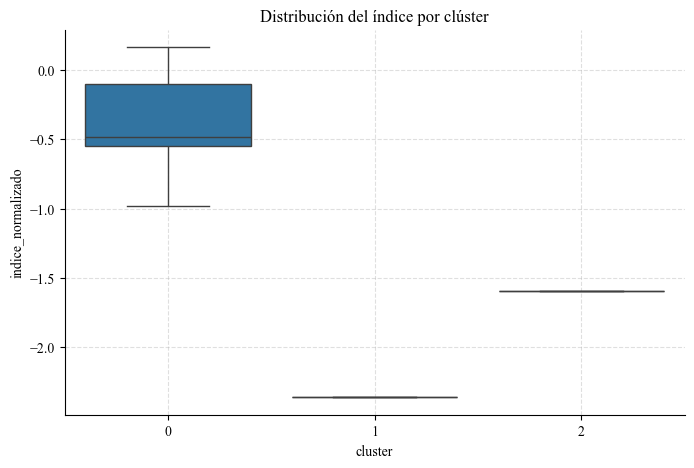

In [ ]:
from sklearn.cluster import KMeans

def clustering_preliminar(df_indice, k=3):
    df_last = df_indice[df_indice["date"] == df_indice["date"].max()]
    model = KMeans(n_clusters=k, random_state=0).fit(df_last[["indice_normalizado"]])
    df_last["cluster"] = model.labels_
    return df_last

df_clusters = clustering_preliminar(df_indice)

# Visualizar
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clusters, x="cluster", y="indice_normalizado")
plt.title("Distribución del índice por clúster")
plt.grid(True)
plt.show()

In [ ]:
df_clusters = clustering_preliminar(df_indice, k=3)

# Agrupar por país y clúster asignado
asignacion_clusters = df_clusters[["country", "cluster"]].sort_values("cluster")
print(asignacion_clusters)

    country  cluster
584      DE        0
586      FR        0
587      GB        0
588      IT        0
590      US        0
589      PT        1
585      ES        2


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\34645\AppData\Local\Temp\ipykernel_20972\3370676903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last["cluster"] = model.labels_


In [ ]:
print("📌 Asignación de países a clústeres:")
for c in sorted(df_clusters["cluster"].unique()):
    paises = df_clusters[df_clusters["cluster"] == c]["country"].tolist()
    print(f"🔹 Cluster {c}: {', '.join(paises)}")


📌 Asignación de países a clústeres:
🔹 Cluster 0: DE, FR, GB, IT, US
🔹 Cluster 1: PT
🔹 Cluster 2: ES


In [ ]:
import pandas as pd

# --- 1. Leer archivos de CPI desde OCDE
path_base = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory"

df_all = pd.read_csv(f"{path_base}\\cpi_all.csv")
df_transport = pd.read_csv(f"{path_base}\\cpi_transport.csv")
df_energy = pd.read_csv(f"{path_base}\\cpi_energy.csv")

# --- 2. Función de limpieza
def limpiar_cpi(df, value_name):
    df = df[["REF_AREA", "TIME_PERIOD", "OBS_VALUE"]].copy()
    df.columns = ["country", "month", value_name]
    df["month"] = pd.to_datetime(df["month"]).dt.to_period("M").astype(str)
    df[value_name] = pd.to_numeric(df[value_name], errors="coerce")
    return df

# --- 3. Limpiar datasets OCDE
df_all = limpiar_cpi(df_all, "cpi_all")
df_transport = limpiar_cpi(df_transport, "cpi_transport")
df_energy = limpiar_cpi(df_energy, "cpi_energy")

# --- 4. Homogeneizar códigos ISO (ISO3 → ISO2)
iso_map = {
    "DEU": "DE", "FRA": "FR", "GBR": "GB",
    "ITA": "IT", "PRT": "PT", "USA": "US", "ESP": "ES"
}

for df in [df_all, df_transport, df_energy]:
    df["country"] = df["country"].map(iso_map)

# --- 5. Cargar CPI energético desde FRED (solo para USA)
df_us_energy = pd.read_csv(f"{path_base}\\cpi_us.csv")

# --- 6. Limpiar CPI energético USA
df_us_energy["month"] = pd.to_datetime(df_us_energy["observation_date"]).dt.to_period("M").astype(str)
df_us_energy["country"] = "US"
df_us_energy = df_us_energy.rename(columns={"CPGREN01USM659N": "cpi_energy"})
df_us_energy = df_us_energy[["country", "month", "cpi_energy"]]

# --- 7. Reemplazar o añadir CPI energético de USA en df_energy
#     Elimina filas anteriores de USA y concatena las nuevas
df_energy = df_energy[df_energy["country"] != "US"]
df_energy = pd.concat([df_energy, df_us_energy], ignore_index=True)

# --- 8. Combinar los tres CPI en un único DataFrame
df_cpi_combined = df_all.merge(df_transport, on=["country", "month"], how="outer")
df_cpi_combined = df_cpi_combined.merge(df_energy, on=["country", "month"], how="outer")

# --- 9. Crear columna 'month' en df_indice si no existe
df_indice["month"] = df_indice["date"].dt.to_period("M").astype(str)

# --- 10. Merge final con el panel
df_model = pd.merge(df_indice, df_cpi_combined, on=["country", "month"], how="left")


In [ ]:
# Ruta al archivo original del boletín
file_path = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory\Weekly_Oil_Bulletin_Prices_History.xlsx"

def load_fuel_prices(file_path, countries=['DE', 'FR', 'UK', 'IT', 'PT', 'ES']):
    df = pd.read_excel(file_path, sheet_name="Prices with taxes", header=[0, 1, 2])

    # Detectar la columna de fechas (triple nivel)
    date_col = [col for col in df.columns if isinstance(col, tuple) and 'Date' in col[2]][0]
    df['Date'] = pd.to_datetime(df[date_col], errors='coerce')
    df = df[df['Date'].notna()]

    tidy = []

    for iso2 in countries:
        # Buscar columnas de gasolina y diésel
        petrol_cols = [col for col in df.columns if col[0] == f"{iso2}_price_with_tax_euro95"]
        diesel_cols = [col for col in df.columns if col[0] == f"{iso2}_price_with_tax_diesel"]

        if petrol_cols:
            tmp = pd.DataFrame({
                'country': iso2,
                'date_daily': df['Date'],
                'variable': 'fuel_price_euro95',
                'value': pd.to_numeric(df[petrol_cols[0]], errors='coerce')
            })
            tidy.append(tmp)

        if diesel_cols:
            tmp = pd.DataFrame({
                'country': iso2,
                'date_daily': df['Date'],
                'variable': 'fuel_price_diesel',
                'value': pd.to_numeric(df[diesel_cols[0]], errors='coerce')
            })
            tidy.append(tmp)

    # Unir todos los países
    fuel_long = pd.concat(tidy, ignore_index=True)
    fuel_long['value'] = fuel_long['value'] / 1000  # €/1000L → €/L
    fuel_long['date'] = fuel_long['date_daily'].dt.to_period('M')

    # Agregar promedio mensual por país y tipo
    fuel_month = (
        fuel_long
        .groupby(['country', 'date', 'variable'], as_index=False)['value']
        .mean()
    )

    # Normalizar códigos país: UK → GB
    fuel_month['country'] = fuel_month['country'].replace({'UK': 'GB'})

    # Filtrar ventana del panel
    fuel_month = fuel_month[
        (fuel_month['date'] >= '2018-01') & (fuel_month['date'] <= '2025-03')
    ]

    return fuel_month

# Ejecutar función con 'UK' y luego mapear a 'GB'
fuel_df = load_fuel_prices(file_path)

# Pivotear a formato ancho
fuel_wide = (
    fuel_df.pivot(index=['country', 'date'], columns='variable', values='value')
           .reset_index()
)

# Asegurar tipo Period[M] para merge
if not pd.api.types.is_period_dtype(df_model['date']):
    df_model['date'] = pd.to_datetime(df_model['date']).dt.to_period('M')

# Merge con el panel principal
df_model = df_model.merge(fuel_wide, how='left', on=['country', 'date'])

# Vista rápida
df_model[df_model['country'] == 'GB'][['date', 'fuel_price_diesel', 'fuel_price_euro95']].dropna().head()



C:\Users\34645\AppData\Local\Temp\ipykernel_20972\2540306633.py:69: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(df_model['date']):


,date,fuel_price_diesel,fuel_price_euro95
2,2018-01,1.407658,1.367884
9,2018-02,1.407462,1.367095
15,2018-03,1.394727,1.352677
22,2018-04,1.429962,1.386757
29,2018-05,1.471450,1.426235


In [ ]:
# Ruta a tus archivos locales
path_gas = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory\GASREGW.csv"
path_diesel = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory\GASDESW.csv"

# 1. Leer archivos semanales
df_gas = pd.read_csv(path_gas, parse_dates=['observation_date'])
df_diesel = pd.read_csv(path_diesel, parse_dates=['observation_date'])

# 2. Definir parámetros de conversión
GALLON_TO_LITRE = 3.78541
eurusd = 0.92  # tipo de cambio USD→EUR, ajustalo con valor real si querés mayor precisión

# 3. Procesar gasolina (GASREGW)
df_gas['value'] = (df_gas['GASREGW'] / GALLON_TO_LITRE) * eurusd
df_gas['country'] = 'US'
df_gas['variable'] = 'fuel_price_euro95'
df_gas['date'] = df_gas['observation_date'].dt.to_period('M')

# 4. Procesar diésel (GASDESW)
df_diesel['value'] = (df_diesel['GASDESW'] / GALLON_TO_LITRE) * eurusd
df_diesel['country'] = 'US'
df_diesel['variable'] = 'fuel_price_diesel'
df_diesel['date'] = df_diesel['observation_date'].dt.to_period('M')

# 5. Agregar por mes
df_gas_month = df_gas.groupby(['country', 'date', 'variable'])['value'].mean().reset_index()
df_diesel_month = df_diesel.groupby(['country', 'date', 'variable'])['value'].mean().reset_index()

# 6. Unir y pivotear
fuel_us = pd.concat([df_gas_month, df_diesel_month], ignore_index=True)

fuel_us_wide = (
    fuel_us.pivot(index=['country', 'date'], columns='variable', values='value')
           .reset_index()
)

# 🔧 Asegurar que columnas sean planas
fuel_us_wide.columns.name = None
fuel_us_wide.columns = [str(col) for col in fuel_us_wide.columns]

# 7. Asegurar que date sea Period[M]
if not pd.api.types.is_period_dtype(df_model['date']):
    df_model['date'] = pd.to_datetime(df_model['date']).dt.to_period('M')

# 8. Merge
df_model = df_model.merge(fuel_us_wide, how='left', on=['country', 'date'])

# ✅ Verificación: mostrar US con precios
df_model[df_model['country'] == 'US'][['date', 'fuel_price_diesel', 'fuel_price_euro95']].dropna().head()


C:\Users\34645\AppData\Local\Temp\ipykernel_20972\1144494342.py:42: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(df_model['date']):


,date,fuel_price_diesel,fuel_price_euro95
5,2018-01,0.733587,0.620866
11,2018-02,0.740234,0.628801
18,2018-03,0.726077,0.629773
25,2018-04,0.752398,0.670057
32,2018-05,0.788356,0.704994


In [ ]:
df_model['fuel_price_diesel'] = df_model['fuel_price_diesel_x'].combine_first(df_model['fuel_price_diesel'])
df_model['fuel_price_euro95'] = df_model['fuel_price_euro95_x'].combine_first(df_model['fuel_price_euro95'])

df_model.drop(columns=[
    'fuel_price_diesel_x', 'fuel_price_diesel_y',
    'fuel_price_euro95_x', 'fuel_price_euro95_y'
], inplace=True)


In [ ]:

# 1. Leer el archivo Excel
ev_path = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory\EV_panel.xlsx"
df_ev = pd.read_excel(ev_path)

# 2. Asegurar formato de fecha y país
df_ev['date'] = pd.to_datetime(df_ev['date']).dt.to_period('M')
df_ev['country'] = df_ev['country'].str.upper()

# 3. Calcular total de registros EV (BEV + PHEV)
df_ev['ev_sales_total'] = df_ev['BEV'] + df_ev['PHEV']

# 4. Seleccionar columnas útiles
df_ev_clean = df_ev[['country', 'date', 'ev_sales_total']]

# 5. Merge con df_model
if not pd.api.types.is_period_dtype(df_model['date']):
    df_model['date'] = pd.to_datetime(df_model['date']).dt.to_period('M')

df_model = df_model.merge(df_ev_clean, how='left', on=['country', 'date'])

# 6. Vista rápida para verificar
df_model[df_model['country'] == 'FR'][['date', 'ev_sales_total']].dropna().head()

C:\Users\34645\AppData\Local\Temp\ipykernel_20972\25625894.py:16: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(df_model['date']):


,date,ev_sales_total
1,2018-01,2331.0
8,2018-02,3138.0
14,2018-03,5411.0
21,2018-04,2833.0
28,2018-05,3098.0


In [ ]:
# 1. Leer el archivo de ventas EV USA
path_ev_us = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory\ev_sales_US_2018_2025.csv"  # o usa el path en /mnt/data si lo descargaste aquí
df_ev_us = pd.read_csv(path_ev_us)

# 2. Asegurar formato
df_ev_us['date'] = pd.to_datetime(df_ev_us['date']).dt.to_period('M')
df_ev_us['country'] = 'US'  # por si viene en minúscula

# 3. Merge con df_model
if not pd.api.types.is_period_dtype(df_model['date']):
    df_model['date'] = pd.to_datetime(df_model['date']).dt.to_period('M')

df_model = df_model.merge(df_ev_us, how='left', on=['country', 'date'])

# 4. Verificar integración
df_model[df_model['country'] == 'US'][['date', 'ev_sales_total']].dropna().head()


C:\Users\34645\AppData\Local\Temp\ipykernel_20972\2604569783.py:10: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(df_model['date']):


,date,ev_sales_total
5,2018-01,15395.0
11,2018-02,15436.0
18,2018-03,22661.0
25,2018-04,22725.0
32,2018-05,23635.0


In [ ]:
# 1. Combinar las columnas: tomar primero la europea, luego US si falta
df_model['ev_sales_total'] = df_model['ev_sales_total_x'].combine_first(df_model['ev_sales_total_y'])

# 2. Eliminar columnas intermedias duplicadas
df_model.drop(columns=['ev_sales_total_x', 'ev_sales_total_y'], inplace=True)

# 3. Verificar resultado
df_model[df_model['ev_sales_total'].notna()][['country', 'date', 'ev_sales_total']].head()


,country,date,ev_sales_total
0,DE,2018-01,5612.0
1,FR,2018-01,2331.0
2,GB,2018-01,3284.0
3,IT,2018-01,574.0
4,PT,2018-01,482.0


In [ ]:
# Ruta al CSV
csv_path = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory\Global_Mobility_Report.csv"
countries_iso2 = ['DE', 'FR', 'GB', 'IT', 'PT', 'US', 'ES']

# Columnas de interés
usecols = [
    'country_region_code', 'date',
    'workplaces_percent_change_from_baseline',
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline'
]

# Leer por chunks
chunks = []
for chunk in pd.read_csv(csv_path, usecols=usecols, parse_dates=['date'], chunksize=200_000):
    chunk = chunk[chunk['country_region_code'].isin(countries_iso2)]
    chunks.append(chunk)

df_mob = pd.concat(chunks, ignore_index=True)

# Renombrar
df_mob.rename(columns={
    'country_region_code': 'country',
    'workplaces_percent_change_from_baseline': 'workplace_mobility',
    'retail_and_recreation_percent_change_from_baseline': 'retail_mobility',
    'grocery_and_pharmacy_percent_change_from_baseline': 'grocery_mobility',
    'transit_stations_percent_change_from_baseline': 'transit_mobility'
}, inplace=True)

# Formato
df_mob['country'] = df_mob['country'].str.upper()
df_mob['date'] = df_mob['date'].dt.to_period('M')

# Promedio mensual por país
df_mob_month = (
    df_mob.groupby(['country', 'date'], as_index=False)[[
        'workplace_mobility',
        'retail_mobility',
        'grocery_mobility',
        'transit_mobility'
    ]].mean()
)

# Merge con df_model
if not pd.api.types.is_period_dtype(df_model['date']):
    df_model['date'] = pd.to_datetime(df_model['date']).dt.to_period('M')

df_model = df_model.merge(df_mob_month, how='left', on=['country', 'date'])

# Opcional: imputar baseline 0 pre-2020
for col in ['workplace_mobility', 'retail_mobility', 'grocery_mobility', 'transit_mobility']:
    df_model[col] = df_model[col].fillna(0)

# Vista rápida
df_model[df_model['country'] == 'DE'][['date', 'workplace_mobility', 'retail_mobility', 'transit_mobility']].head()


C:\Users\34645\AppData\Local\Temp\ipykernel_20972\1567505721.py:46: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(df_model['date']):


,date,workplace_mobility,retail_mobility,transit_mobility
0,2018-01,0.0,0.0,0.0
6,2018-02,0.0,0.0,0.0
12,2018-03,0.0,0.0,0.0
19,2018-04,0.0,0.0,0.0
26,2018-05,0.0,0.0,0.0


In [ ]:
import pandas as pd
import glob
import os

# 1. Ruta local a la carpeta con los archivos OECD
folder = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory"
pattern = os.path.join(folder, "LRHUTTTT*.csv")

# 2. Mapeo ISO2 (porque los archivos terminan en IT, DE, etc.)
iso_code_map = {
    'DE': 'DE',
    'ES': 'ES',
    'FR': 'FR',
    'GB': 'GB',
    'IT': 'IT',
    'PT': 'PT',
    'US': 'US'
}

# 3. Leer y preparar todos los archivos
dfs = []

for filepath in glob.glob(pattern):
    filename = os.path.basename(filepath)
    iso2 = filename.replace("LRHUTTTT", "").replace("M156S.csv", "")
    
    print(f"Procesando archivo: {filename} | ISO2 detectado: {iso2}")

    if iso2 in iso_code_map:
        try:
            df = pd.read_csv(filepath)
            # Renombrar columnas dinámicamente
            date_col, value_col = df.columns[:2]
            df = df.rename(columns={
                date_col: 'date',
                value_col: 'unemployment_rate'
            })
            df['date'] = pd.to_datetime(df['date']).dt.to_period('M')
            df['country'] = iso_code_map[iso2]
            dfs.append(df[['country', 'date', 'unemployment_rate']])
        except Exception as e:
            print(f"⚠️ Error procesando {filename}: {e}")

# 4. Concatenar todos los países
if dfs:
    df_unemp = pd.concat(dfs, ignore_index=True)

    # 5. Asegurar Period[M] en df_model
    if not pd.api.types.is_period_dtype(df_model['date']):
        df_model['date'] = pd.to_datetime(df_model['date']).dt.to_period('M')

    # 6. Merge por país y mes
    df_model = df_model.merge(df_unemp, how='left', on=['country', 'date'])

    # 7. Vista rápida
    print("✅ Integración completa. Ejemplo para IT:")
    print(df_model[df_model['country'] == 'IT'][['date', 'unemployment_rate']].dropna().head())

else:
    print("🚫 No se cargó ningún archivo. Verificá nombres y extensión .csv")


Procesando archivo: LRHUTTTTDEM156S.csv | ISO2 detectado: DE
Procesando archivo: LRHUTTTTESM156S.csv | ISO2 detectado: ES
Procesando archivo: LRHUTTTTFRM156S.csv | ISO2 detectado: FR
Procesando archivo: LRHUTTTTGBM156S.csv | ISO2 detectado: GB
Procesando archivo: LRHUTTTTITM156S.csv | ISO2 detectado: IT
Procesando archivo: LRHUTTTTPTM156S.csv | ISO2 detectado: PT
Procesando archivo: LRHUTTTTUSM156S.csv | ISO2 detectado: US
✅ Integración completa. Ejemplo para IT:
       date  unemployment_rate
3   2018-01               11.0
10  2018-02               10.8
16  2018-03               10.9
23  2018-04               11.0
30  2018-05               10.6


C:\Users\34645\AppData\Local\Temp\ipykernel_20972\287687234.py:49: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(df_model['date']):


In [ ]:
df_model

,date,country,movilidad_sostenible,indice_normalizado,month,cpi_all,cpi_transport,cpi_energy,fuel_price_diesel,fuel_price_euro95,ev_sales_total,workplace_mobility,retail_mobility,grocery_mobility,transit_mobility,unemployment_rate
0,2018-01,DE,1.320575,1.401042,2018-01,1.5,1.5,0.700000,1.199600,1.366600,5612.0,0.0,0.0,0.0,0.0,3.3
1,2018-01,FR,0.442751,0.469729,2018-01,2.6,1.5,5.100000,1.374224,1.461024,2331.0,0.0,0.0,0.0,0.0,9.2
2,2018-01,GB,1.024528,1.086956,2018-01,3.4,3.0,4.300000,1.407658,1.367884,3284.0,0.0,0.0,0.0,0.0,4.2
3,2018-01,IT,-0.256650,-0.272288,2018-01,1.6,1.2,4.600000,1.439560,1.565374,574.0,0.0,0.0,0.0,0.0,11.0
4,2018-01,PT,2.349350,2.492503,2018-01,3.3,1.1,2.300000,1.328000,1.520200,482.0,0.0,0.0,0.0,0.0,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2025-01,FR,-0.520417,-0.552127,2025-01,1.0,1.8,2.600000,1.699970,1.802305,24777.0,0.0,0.0,0.0,0.0,7.3
587,2025-01,GB,-0.456790,-0.484624,2025-01,1.7,3.0,-6.600000,NaN,NaN,42318.0,0.0,0.0,0.0,0.0,NaN
588,2025-01,IT,0.154179,0.163574,2025-01,1.0,1.7,-0.700000,1.707667,1.805000,11579.0,0.0,0.0,0.0,0.0,6.2
589,2025-01,PT,-2.224745,-2.360306,2025-01,2.2,2.7,2.700000,1.657250,1.760500,5217.0,0.0,0.0,0.0,0.0,6.3


In [ ]:
# 1. Leer tipo de cambio diario
fx_path = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory\DEXUSEU.csv"
df_fx = pd.read_csv(fx_path)

# 2. Convertir a Period[M] y calcular promedio mensual
df_fx.rename(columns={'observation_date': 'date', 'DEXUSEU': 'exchange_rate_usdeur'}, inplace=True)
df_fx['date'] = pd.to_datetime(df_fx['date']).dt.to_period('M')
df_fx_month = df_fx.groupby('date', as_index=False)['exchange_rate_usdeur'].mean()

# 3. Merge directo con todos los países
if not pd.api.types.is_period_dtype(df_model['date']):
    df_model['date'] = pd.to_datetime(df_model['date']).dt.to_period('M')

df_model = df_model.merge(df_fx_month, how='left', on='date')

# Verificar
df_model[['country', 'date', 'exchange_rate_usdeur']].dropna().head()



C:\Users\34645\AppData\Local\Temp\ipykernel_20972\970010928.py:11: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(df_model['date']):


,country,date,exchange_rate_usdeur
0,DE,2018-01,1.219652
1,FR,2018-01,1.219652
2,GB,2018-01,1.219652
3,IT,2018-01,1.219652
4,PT,2018-01,1.219652


In [ ]:
# 1. Ruta local del archivo
file_path = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory\OECD.SDD.STES,DSD_STES@DF_CLI,+PRT+USA+GBR+ESP+ITA+DEU+FRA.M.CCICP...AA...H.csv"

# 2. Leer el CSV completo
df_cci = pd.read_csv(file_path)

# 3. Filtrar solo filas con observaciones (fila empieza con "DATAFLOW")
df_cci = df_cci[df_cci['STRUCTURE'] == 'DATAFLOW']

# 4. Seleccionar columnas clave
df_cci_clean = df_cci[['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE']].copy()
df_cci_clean.columns = ['country', 'date', 'consumer_confidence_index']

# 5. Convertir fecha y tipo
df_cci_clean['date'] = pd.to_datetime(df_cci_clean['date']).dt.to_period('M')
df_cci_clean['consumer_confidence_index'] = pd.to_numeric(df_cci_clean['consumer_confidence_index'], errors='coerce')

# 6. Convertir código ISO3 → ISO2
iso3_to_iso2 = {
    'DEU': 'DE',
    'FRA': 'FR',
    'ITA': 'IT',
    'PRT': 'PT',
    'ESP': 'ES',
    'GBR': 'GB',
    'USA': 'US'
}
df_cci_clean['country'] = df_cci_clean['country'].map(iso3_to_iso2)

# 7. Merge con tu df_model
if not pd.api.types.is_period_dtype(df_model['date']):
    df_model['date'] = pd.to_datetime(df_model['date']).dt.to_period('M')

df_model = df_model.merge(df_cci_clean, how='left', on=['country', 'date'])

# 8. Verificación rápida
df_model[df_model['country'] == 'PT'][['date', 'consumer_confidence_index']].dropna().head()

C:\Users\34645\AppData\Local\Temp\ipykernel_20972\3985214736.py:31: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(df_model['date']):


,date,consumer_confidence_index
4,2018-01,102.0789
17,2018-03,102.1752
24,2018-04,102.1641
31,2018-05,102.0984
38,2018-06,101.9692


In [ ]:
df_model

,date,country,movilidad_sostenible,indice_normalizado,month,cpi_all,cpi_transport,cpi_energy,fuel_price_diesel,fuel_price_euro95,ev_sales_total,workplace_mobility,retail_mobility,grocery_mobility,transit_mobility,unemployment_rate,exchange_rate_usdeur,consumer_confidence_index
0,2018-01,DE,1.320575,1.401042,2018-01,1.5,1.5,0.700000,1.199600,1.366600,5612.0,0.0,0.0,0.0,0.0,3.3,1.219652,102.03790
1,2018-01,FR,0.442751,0.469729,2018-01,2.6,1.5,5.100000,1.374224,1.461024,2331.0,0.0,0.0,0.0,0.0,9.2,1.219652,101.09800
2,2018-01,GB,1.024528,1.086956,2018-01,3.4,3.0,4.300000,1.407658,1.367884,3284.0,0.0,0.0,0.0,0.0,4.2,1.219652,100.66040
3,2018-01,IT,-0.256650,-0.272288,2018-01,1.6,1.2,4.600000,1.439560,1.565374,574.0,0.0,0.0,0.0,0.0,11.0,1.219652,101.37390
4,2018-01,PT,2.349350,2.492503,2018-01,3.3,1.1,2.300000,1.328000,1.520200,482.0,0.0,0.0,0.0,0.0,7.9,1.219652,102.07890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2025-01,FR,-0.520417,-0.552127,2025-01,1.0,1.8,2.600000,1.699970,1.802305,24777.0,0.0,0.0,0.0,0.0,7.3,1.035590,98.47190
587,2025-01,GB,-0.456790,-0.484624,2025-01,1.7,3.0,-6.600000,NaN,NaN,42318.0,0.0,0.0,0.0,0.0,NaN,1.035590,98.91624
588,2025-01,IT,0.154179,0.163574,2025-01,1.0,1.7,-0.700000,1.707667,1.805000,11579.0,0.0,0.0,0.0,0.0,6.2,1.035590,100.02980
589,2025-01,PT,-2.224745,-2.360306,2025-01,2.2,2.7,2.700000,1.657250,1.760500,5217.0,0.0,0.0,0.0,0.0,6.3,1.035590,99.89841


In [ ]:
# 1. Ruta a la carpeta con los archivos
base_path = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory"

# 2. Mapeo nombre archivo → ISO2
country_files = {
    'italy.csv': 'IT',
    'spain.csv': 'ES',
    'france.csv': 'FR',
    'portugal.csv': 'PT',
    'germany.csv': 'DE',
    'united-kingdom.csv': 'GB',
    'united-states.csv': 'US'
}

# 3. Lista para almacenar resultados
dfs = []

# 4. Leer e integrar cada archivo
for file_name, iso2 in country_files.items():
    file_path = os.path.join(base_path, file_name)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, comment='#')  # ignora líneas con "#"
        df['country'] = iso2
        df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=15)).dt.to_period('M')
        df.rename(columns={'temperature_C': 'temperature_mean'}, inplace=True)
        dfs.append(df[['country', 'date', 'temperature_mean']])
    else:
        print(f"Archivo no encontrado: {file_name}")

# 5. Concatenar todo
df_temp = pd.concat(dfs, ignore_index=True)

# 6. Filtrar periodo de interés
df_temp = df_temp[(df_temp['date'] >= '2018-01') & (df_temp['date'] <= '2025-03')]

# 7. Unir con df_model
if not pd.api.types.is_period_dtype(df_model['date']):
    df_model['date'] = pd.to_datetime(df_model['date']).dt.to_period('M')

df_model = df_model.merge(df_temp, how='left', on=['country', 'date'])


C:\Users\34645\AppData\Local\Temp\ipykernel_20972\3221129068.py:37: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(df_model['date']):


In [ ]:
df_model

,date,country,movilidad_sostenible,indice_normalizado,month,cpi_all,cpi_transport,cpi_energy,fuel_price_diesel,fuel_price_euro95,ev_sales_total,workplace_mobility,retail_mobility,grocery_mobility,transit_mobility,unemployment_rate,exchange_rate_usdeur,consumer_confidence_index,temperature_mean
0,2018-01,DE,1.320575,1.401042,2018-01,1.5,1.5,0.700000,1.199600,1.366600,5612.0,0.0,0.0,0.0,0.0,3.3,1.219652,102.03790,12.423
1,2018-01,FR,0.442751,0.469729,2018-01,2.6,1.5,5.100000,1.374224,1.461024,2331.0,0.0,0.0,0.0,0.0,9.2,1.219652,101.09800,14.397
2,2018-01,GB,1.024528,1.086956,2018-01,3.4,3.0,4.300000,1.407658,1.367884,3284.0,0.0,0.0,0.0,0.0,4.2,1.219652,100.66040,10.009
3,2018-01,IT,-0.256650,-0.272288,2018-01,1.6,1.2,4.600000,1.439560,1.565374,574.0,0.0,0.0,0.0,0.0,11.0,1.219652,101.37390,15.564
4,2018-01,PT,2.349350,2.492503,2018-01,3.3,1.1,2.300000,1.328000,1.520200,482.0,0.0,0.0,0.0,0.0,7.9,1.219652,102.07890,15.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2025-01,FR,-0.520417,-0.552127,2025-01,1.0,1.8,2.600000,1.699970,1.802305,24777.0,0.0,0.0,0.0,0.0,7.3,1.035590,98.47190,NaN
587,2025-01,GB,-0.456790,-0.484624,2025-01,1.7,3.0,-6.600000,NaN,NaN,42318.0,0.0,0.0,0.0,0.0,NaN,1.035590,98.91624,NaN
588,2025-01,IT,0.154179,0.163574,2025-01,1.0,1.7,-0.700000,1.707667,1.805000,11579.0,0.0,0.0,0.0,0.0,6.2,1.035590,100.02980,NaN
589,2025-01,PT,-2.224745,-2.360306,2025-01,2.2,2.7,2.700000,1.657250,1.760500,5217.0,0.0,0.0,0.0,0.0,6.3,1.035590,99.89841,NaN


In [ ]:
import pandas as pd
import os

# --------- CONFIGURACIÓN ---------
base_path = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory"
archivos = {
    'PT': 'charging_points_PT.csv',
    'ES': 'charging_points_ES.csv',
    'GB': 'charging_points_GB.csv',
    'FR': 'charging_points_FR.csv',
    'DE': 'charging_points_DE.csv',
    'IT': 'charging_points_IT.csv',
}

# --------- FUNCIONES ---------
def quarter_to_date(qstr):
    year, quarter = qstr.split(' Q')
    month = {'1': '01', '2': '04', '3': '07', '4': '10'}[str(quarter)]
    return pd.to_datetime(f"{year}-{month}-01")

# --------- LECTURA Y PROCESAMIENTO ---------
df_list = []
for pais, archivo in archivos.items():
    df = pd.read_csv(os.path.join(base_path, archivo))
    df.columns = df.columns.str.strip()  # Limpieza de columnas
    df['country'] = pais
    df['date'] = df['Category'].apply(quarter_to_date)
    df['charging_total'] = df['AC'] + df['DC']
    df_list.append(df[['country', 'date', 'charging_total']])

df_chargers = pd.concat(df_list).sort_values(['country', 'date']).reset_index(drop=True)

# --------- INTERPOLACIÓN MENSUAL ---------
df_chargers['date'] = pd.to_datetime(df_chargers['date'])  # asegurar timestamps
df_monthly = (
    df_chargers
    .set_index('date')
    .groupby('country')['charging_total']
    .resample('MS')  # primer día del mes
    .interpolate('linear')
    .reset_index()
)

# --------- NORMALIZACIÓN DE df_model ---------
df_model['date'] = df_model['date'].dt.to_timestamp()  # convertir Period → Timestamp
df_monthly['date'] = df_monthly['date'].dt.to_period('M').dt.to_timestamp()

# --------- OPCIONAL: eliminar US si no hay datos ---------
df_model = df_model[df_model['country'].isin(df_monthly['country'].unique())]

# --------- MERGE ---------
df_model = df_model.merge(df_monthly, on=['country', 'date'], how='left')

# --------- VERIFICACIÓN ---------
print("Valores no nulos en charging_total:", df_model['charging_total'].notna().sum())
print(df_model[df_model['charging_total'].notna()][['country', 'date', 'charging_total']].head())


Valores no nulos en charging_total: 365
    country       date  charging_total
141      DE 2020-01-01    33394.000000
142      ES 2020-01-01     2345.000000
143      FR 2020-01-01    45146.285714
144      GB 2020-01-01    17373.000000
145      IT 2020-01-01     7702.000000


In [ ]:
df_model['country'].unique()

array(['DE', 'FR', 'GB', 'IT', 'PT', 'ES'], dtype=object)

In [ ]:
# Ruta al archivo
us_path = r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\raw_explanatory\charging_points_US.csv"

# Leer y limpiar
df_us = pd.read_csv(us_path, sep=";")

# Renombrar columnas (por si hay espacios raros o unicode)
df_us.columns = df_us.columns.str.strip().str.replace('–', '-').str.replace(' ', '_')

# Convertir fecha y sumar cargadores
df_us['date'] = pd.to_datetime(df_us['DateTime']).dt.to_period('M').dt.to_timestamp()
df_us['charging_total'] = df_us['Available_-_Level_2'] + df_us['Available_-_DC_Fast']
df_us['country'] = 'US'

# Seleccionar columnas relevantes
df_us = df_us[['country', 'date', 'charging_total']]

# Opcional: añadir al df_model existente
# Actualizar charging_total de US en df_model EXISTENTE
df_model.set_index(['country', 'date'], inplace=True)
df_us.set_index(['country', 'date'], inplace=True)

# Solo actualiza la columna charging_total donde coinciden country+date
df_model.update(df_us)

# Volver a resetear índice
df_model.reset_index(inplace=True)
# (Opcional) Añadir Δ mensual
df_model['delta_charging_total'] = (
    df_model
    .sort_values(['country', 'date'])
    .groupby('country')['charging_total']
    .diff()
)

# Verificar
print(df_model[df_model['country'] == 'US'][['date', 'charging_total']].head())

Empty DataFrame
Columns: [date, charging_total]
Index: []


In [ ]:
print(df_us.columns.tolist())


['charging_total']


In [ ]:
df_model

,country,date,movilidad_sostenible,indice_normalizado,month,cpi_all,cpi_transport,cpi_energy,fuel_price_diesel,fuel_price_euro95,...,workplace_mobility,retail_mobility,grocery_mobility,transit_mobility,unemployment_rate,exchange_rate_usdeur,consumer_confidence_index,temperature_mean,charging_total,delta_charging_total
0,DE,2018-01-01,1.320575,1.401042,2018-01,1.5,1.5,0.7,1.199600,1.366600,...,0.0,0.0,0.0,0.0,3.3,1.219652,102.03790,12.423,NaN,NaN
1,FR,2018-01-01,0.442751,0.469729,2018-01,2.6,1.5,5.1,1.374224,1.461024,...,0.0,0.0,0.0,0.0,9.2,1.219652,101.09800,14.397,NaN,NaN
2,GB,2018-01-01,1.024528,1.086956,2018-01,3.4,3.0,4.3,1.407658,1.367884,...,0.0,0.0,0.0,0.0,4.2,1.219652,100.66040,10.009,NaN,NaN
3,IT,2018-01-01,-0.256650,-0.272288,2018-01,1.6,1.2,4.6,1.439560,1.565374,...,0.0,0.0,0.0,0.0,11.0,1.219652,101.37390,15.564,NaN,NaN
4,PT,2018-01-01,2.349350,2.492503,2018-01,3.3,1.1,2.3,1.328000,1.520200,...,0.0,0.0,0.0,0.0,7.9,1.219652,102.07890,15.233,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,ES,2025-01-01,-1.500877,-1.592330,2025-01,1.3,2.9,7.8,1.483450,1.559775,...,0.0,0.0,0.0,0.0,10.5,1.035590,100.51290,NaN,41942.0,-1090.333333
502,FR,2025-01-01,-0.520417,-0.552127,2025-01,1.0,1.8,2.6,1.699970,1.802305,...,0.0,0.0,0.0,0.0,7.3,1.035590,98.47190,NaN,164886.0,2985.000000
503,GB,2025-01-01,-0.456790,-0.484624,2025-01,1.7,3.0,-6.6,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,1.035590,98.91624,NaN,90365.0,756.000000
504,IT,2025-01-01,0.154179,0.163574,2025-01,1.0,1.7,-0.7,1.707667,1.805000,...,0.0,0.0,0.0,0.0,6.2,1.035590,100.02980,NaN,62796.0,1535.666667


In [ ]:
import wbdata
import pandas as pd
import datetime

# --- Países ---
paises_iso2 = ['DE', 'FR', 'GB', 'IT', 'PT', 'US', 'ES']

# --- Indicadores (agrupados y homogéneos) ---
indicadores = {
    # Emisiones transporte
    "EN.GHG.N2O.TR.MT.CE.AR5": "n2o_transport_emissions_mtco2e",
    "EN.GHG.CO2.TR.MT.CE.AR5": "co2_transport_emissions_mtco2e",

    # Educación
    "SE.TER.ENRR": "tertiary_enrollment_pct",

    # Desigualdad
    "SI.POV.GINI": "gini_index",

    # Demografía (rangos grandes)
    "SP.POP.0014.TO.ZS": "population_0_14_pct",
    "SP.POP.1564.TO.ZS": "population_15_64_pct",
    "SP.POP.65UP.TO.ZS": "population_65_plus_pct",
    "SP.POP.TOTL.FE.ZS": "female_population_pct",
    "SP.POP.BRTH.MF": "sex_ratio_birth",

    # Estructurales / ambientales / acceso
    "NY.GDP.PCAP.PP.KD": "gdp_per_capita",
    "SP.POP.TOTL": "population_total",
    "SP.URB.TOTL.IN.ZS": "urban_population_share",
    "EN.POP.DNST": "population_density",
    "EN.URB.MCTY.TL.ZS": "urban_population_largecities",
    "EN.ATM.PM25.MC.M3": "pm25_pollution",
    "EG.USE.PCAP.KG.OE": "electricity_use_per_capita",
    "EG.ELC.ACCS.ZS": "access_to_electricity",
    "IT.NET.USER.ZS": "internet_access_pct",
    "SP.POP.DPND": "dependency_ratio"
}

# --- Rango de años ---
inicio = datetime.datetime(2018, 1, 1)
fin = datetime.datetime(2025, 1, 1)

# --- Descarga segura ---
dataframes = []
exitosos = []
fallidos = []

print("📦 Descargando indicadores uno por uno...\n")

for code, nombre in indicadores.items():
    try:
        df_temp = wbdata.get_dataframe(indicators={code: nombre}, country=paises_iso2)
        df_temp = df_temp.reset_index()
        df_temp['date'] = pd.to_datetime(df_temp['date'], format='%Y')
        df_temp = df_temp[(df_temp['date'] >= inicio) & (df_temp['date'] <= fin)]
        dataframes.append(df_temp)
        exitosos.append((code, nombre))
        print(f"✅ {nombre} ({code}) descargado correctamente.")
    except Exception as e:
        fallidos.append((code, nombre))
        print(f"❌ ERROR en {nombre} ({code}): {str(e)}")

# --- Unión e integración ---
if dataframes:
    df_merged = dataframes[0]
    for df in dataframes[1:]:
        df_merged = pd.merge(df_merged, df, on=["country", "date"], how="outer")

    df_merged['year'] = df_merged['date'].dt.year
    df_cross_section = df_merged.drop(columns='date').sort_values(['country', 'year'])

    # Guardar resultado
    #df_cross_section.to_csv("cross_section_enriched.csv", index=False)
    #print("\n💾 Archivo guardado como 'cross_section_enriched.csv'.")
    #print("\n🔍 Vista previa:")
    #print(df_cross_section.head())
else:
    print("\n⚠️ No se pudo descargar ningún indicador.")

# --- Resumen final ---
print("\n📊 RESUMEN FINAL:")
print(f"Indicadores descargados: {len(exitosos)}")
for code, name in exitosos:
    print(f"  ✅ {name} ({code})")

if fallidos:
    print(f"\n❌ Indicadores con error ({len(fallidos)}):")
    for code, name in fallidos:
        print(f"  - {name} ({code})")

📦 Descargando indicadores uno por uno...

✅ n2o_transport_emissions_mtco2e (EN.GHG.N2O.TR.MT.CE.AR5) descargado correctamente.
✅ co2_transport_emissions_mtco2e (EN.GHG.CO2.TR.MT.CE.AR5) descargado correctamente.
✅ tertiary_enrollment_pct (SE.TER.ENRR) descargado correctamente.
✅ gini_index (SI.POV.GINI) descargado correctamente.
✅ population_0_14_pct (SP.POP.0014.TO.ZS) descargado correctamente.
✅ population_15_64_pct (SP.POP.1564.TO.ZS) descargado correctamente.
✅ population_65_plus_pct (SP.POP.65UP.TO.ZS) descargado correctamente.
✅ female_population_pct (SP.POP.TOTL.FE.ZS) descargado correctamente.
✅ sex_ratio_birth (SP.POP.BRTH.MF) descargado correctamente.
✅ gdp_per_capita (NY.GDP.PCAP.PP.KD) descargado correctamente.
✅ population_total (SP.POP.TOTL) descargado correctamente.
✅ urban_population_share (SP.URB.TOTL.IN.ZS) descargado correctamente.
✅ population_density (EN.POP.DNST) descargado correctamente.
✅ urban_population_largecities (EN.URB.MCTY.TL.ZS) descargado correctamente.

In [ ]:
print(df_model['date'].head())
print(df_cross_section_expanded['date'].head())
print(df_model['country'].unique())
print(df_cross_section_expanded['country'].unique())


0   2018-01-01
1   2018-01-01
2   2018-01-01
3   2018-01-01
4   2018-01-01
Name: date, dtype: datetime64[ns]
0   2018-01-01
0   2018-02-01
0   2018-03-01
0   2018-04-01
0   2018-05-01
Name: date, dtype: datetime64[ns]
['DE', 'FR', 'GB', 'IT', 'PT', 'ES']
Categories (6, object): ['DE', 'ES', 'FR', 'GB', 'IT', 'PT']
['France' 'Germany' 'Italy' 'Portugal' 'Spain' 'United Kingdom'
 'United States']


In [ ]:
# 1. Homogeneizar formato de fechas
df_model['date'] = pd.to_datetime(df_model['date']).dt.to_period('M').dt.to_timestamp()

# 2. Convertir nombres a códigos ISO-2
pais_to_iso2 = {
    'Germany': 'DE',
    'France': 'FR',
    'United Kingdom': 'GB',
    'Italy': 'IT',
    'Portugal': 'PT',
    'Spain': 'ES',
    'United States': 'US'
}
df_cross_section_expanded['country'] = df_cross_section_expanded['country'].map(pais_to_iso2)

# 3. Ahora sí, merge
df_panel_final = pd.merge(df_model, df_cross_section_expanded, on=["country", "date"], how="left")


In [ ]:
df_panel_final

,country,date,movilidad_sostenible,indice_normalizado,month_x,cpi_all,cpi_transport,cpi_energy,fuel_price_diesel,fuel_price_euro95,...,urban_population_share,population_density,urban_population_largecities,pm25_pollution,electricity_use_per_capita,access_to_electricity,internet_access_pct,dependency_ratio,year_y,month_y
0,DE,2018-01-01,1.320575,1.401042,2018-01-01,1.5,1.5,0.7,1.199600,1.366600,...,77.312,237.294012,9.583031,11.652603,3659.229245,100.0,87.0,53.875455,2018.0,1.0
1,FR,2018-01-01,0.442751,0.469729,2018-01-01,2.6,1.5,5.1,1.374224,1.461024,...,80.444,122.650880,22.699104,10.459945,3665.535730,100.0,82.0,60.824979,2018.0,1.0
2,GB,2018-01-01,1.024528,1.086956,2018-01-01,3.4,3.0,4.3,1.407658,1.367884,...,83.398,274.708982,26.830458,10.239785,2625.364622,100.0,90.7,57.004444,2018.0,1.0
3,IT,2018-01-01,-0.256650,-0.272288,2018-01-01,1.6,1.2,4.6,1.439560,1.565374,...,70.438,204.322226,18.744154,16.335436,2492.034900,100.0,74.4,56.307901,2018.0,1.0
4,PT,2018-01-01,2.349350,2.492503,2018-01-01,3.3,1.1,2.3,1.328000,1.520200,...,65.211,112.261936,41.173894,9.026015,2140.975589,100.0,74.7,55.400096,2018.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,ES,2025-01-01,-1.500877,-1.592330,2025-01-01,1.3,2.9,7.8,1.483450,1.559775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,FR,2025-01-01,-0.520417,-0.552127,2025-01-01,1.0,1.8,2.6,1.699970,1.802305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,GB,2025-01-01,-0.456790,-0.484624,2025-01-01,1.7,3.0,-6.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,IT,2025-01-01,0.154179,0.163574,2025-01-01,1.0,1.7,-0.7,1.707667,1.805000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🔎 Analizando missing values...

📊 % de Missing por Variable:

temperature_mean                  58.102767
pm25_pollution                    58.102767
gini_index                        46.245059
tertiary_enrollment_pct           29.644269
population_density                29.644269
delta_charging_total              29.051383
charging_total                    27.865613
n2o_transport_emissions_mtco2e    15.415020
population_total                  15.415020
co2_transport_emissions_mtco2e    15.415020
population_65_plus_pct            15.415020
female_population_pct             15.415020
sex_ratio_birth                   15.415020
gdp_per_capita                    15.415020
urban_population_share            15.415020
population_15_64_pct              15.415020
electricity_use_per_capita        15.415020
access_to_electricity             15.415020
dependency_ratio                  15.415020
population_0_14_pct               15.415020
internet_access_pct               13.043478
fuel_price_eur

C:\Users\34645\AppData\Local\Temp\ipykernel_20972\2510287852.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot_missing = df.groupby([country_col, 'year']).apply(lambda x: x.isnull().mean().mean()).reset_index()


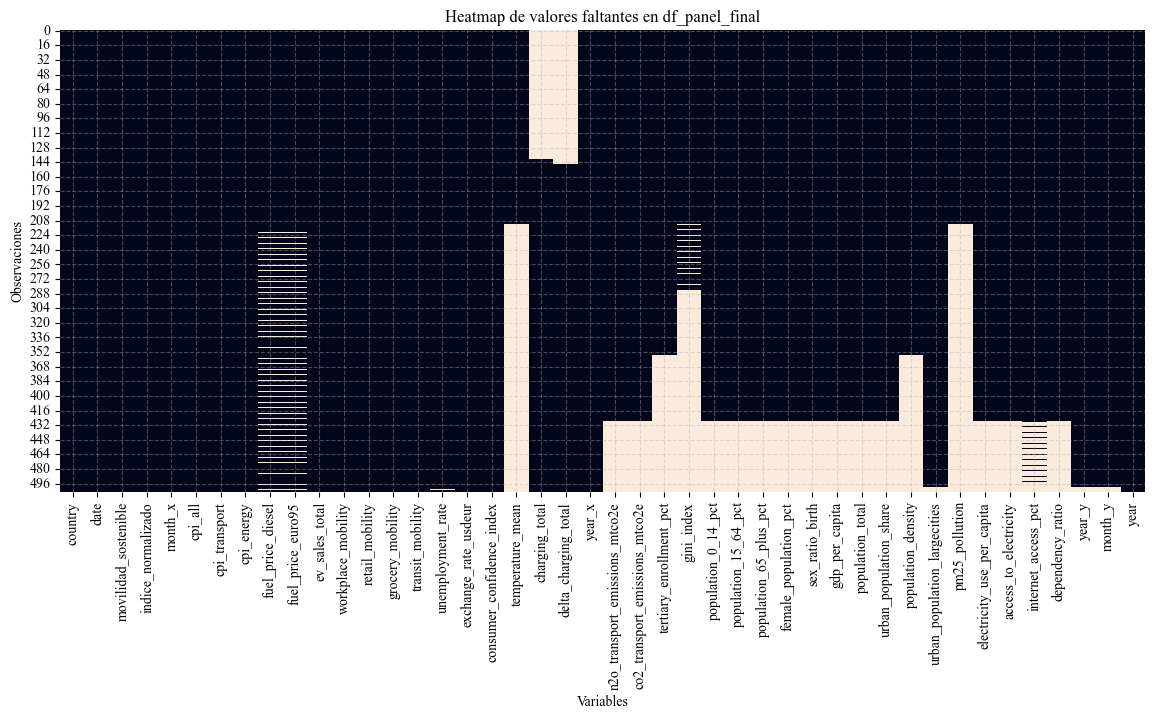

🧮 Total de filas: 506
✅ Filas completas (sin NaN): 65 (12.85%)
⚠️ Filas con al menos un NaN: 441 (87.15%)

📝 Notas clave:
- Variables estructurales anuales replicadas suelen tener pocos missing, salvo si falta año entero.
- Variables económicas/mensuales pueden tener missing en meses concretos (p.ej., precios o charging data en early periods).
- Missing concentrado en ciertos países/años puede requerir imputación, exclusión o tratamiento especial.
- Muchos missing en una variable -> considerar si eliminarla del modelo o imputarla.
- Panel puede seguir siendo usable si los missing son aleatorios y no sistemáticos.
- Si el % de filas completas es muy bajo (<70%), imputar missing puede ser mejor que eliminar filas.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Análisis de Missing Values ---

def analizar_missing_panel(df, country_col='country', date_col='date'):
    print("🔎 Analizando missing values...\n")
    
    # 1. % de missing por columna
    missing_pct = df.isnull().mean().sort_values(ascending=False) * 100
    print("📊 % de Missing por Variable:\n")
    print(missing_pct)
    
    print("\n" + "="*50 + "\n")
    
    # 2. % de missing por país y año
    df['year'] = pd.to_datetime(df[date_col]).dt.year
    pivot_missing = df.groupby([country_col, 'year']).apply(lambda x: x.isnull().mean().mean()).reset_index()
    pivot_missing.columns = [country_col, 'year', 'missing_pct_avg']
    
    print("📊 % de Missing promedio por País y Año:\n")
    print(pivot_missing.sort_values('missing_pct_avg', ascending=False))
    
    print("\n" + "="*50 + "\n")
    
    # 3. Heatmap general de missing
    print("📈 Mostrando heatmap general de missing values...\n")
    plt.figure(figsize=(14,6))
    sns.heatmap(df.isnull(), cbar=False)
    plt.title('Heatmap de valores faltantes en df_panel_final')
    plt.xlabel('Variables')
    plt.ylabel('Observaciones')
    plt.show()
    
    # 4. Conteo de filas completas vs incompletas
    total_rows = len(df)
    complete_rows = len(df.dropna())
    missing_rows = total_rows - complete_rows
    print(f"🧮 Total de filas: {total_rows}")
    print(f"✅ Filas completas (sin NaN): {complete_rows} ({(complete_rows/total_rows)*100:.2f}%)")
    print(f"⚠️ Filas con al menos un NaN: {missing_rows} ({(missing_rows/total_rows)*100:.2f}%)")
    
    # 5. Notas interpretativas
    notas = """
📝 Notas clave:
- Variables estructurales anuales replicadas suelen tener pocos missing, salvo si falta año entero.
- Variables económicas/mensuales pueden tener missing en meses concretos (p.ej., precios o charging data en early periods).
- Missing concentrado en ciertos países/años puede requerir imputación, exclusión o tratamiento especial.
- Muchos missing en una variable -> considerar si eliminarla del modelo o imputarla.
- Panel puede seguir siendo usable si los missing son aleatorios y no sistemáticos.
- Si el % de filas completas es muy bajo (<70%), imputar missing puede ser mejor que eliminar filas.
"""
    print(notas)

# --- Ejecutar ---
analizar_missing_panel(df_panel_final)


In [ ]:
# Exportar el panel completo original
df_panel_final.to_csv(r"C:\Users\34645\Desktop\projects\GoogleTrends\Data\panel_mobility_sostenible_original.csv", index=False)

print("✅ Archivo exportado como 'panel_mobility_sostenible_original.csv'")



✅ Archivo exportado como 'panel_mobility_sostenible_original.csv'
